In [46]:
import os 
import cv20
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import scipy

In [47]:
train_dir = '/kaggle/input/tomato-dataset/n_train'  # Path to the training dataset
validation_dir = '/kaggle/input/tomato-dataset/n_val'  # Path to the validation dataset
test_dr = "/kaggle/input/tomato/n_test"

In [65]:
img_width, img_height = 256, 256
batch_size = 32
b = 1.95
# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11105 images belonging to 6 classes.
Found 2495 images belonging to 6 classes.


In [49]:
test_generator = train_datagen.flow_from_directory(
    test_dr,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 280 images belonging to 6 classes.


In [50]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2495 images belonging to 6 classes.


In [62]:
# Build the CNN model
model = Sequential()
a = 2.599
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [69]:
validation_generator = train_datagen.flow_from_directory(
                       validation_dir,
                       target_size=(256, 256),
                       batch_size=32)
c = 1.7


Found 2495 images belonging to 6 classes.


In [13]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/50
348/348 [==============================] - 228s 626ms/step - loss: 1.8938 - accuracy: 0.4469 - val_loss: 1.1336 - val_accuracy: 0.5976 - lr: 0.0010
Epoch 2/50
348/348 [==============================] - 194s 558ms/step - loss: 1.1091 - accuracy: 0.6004 - val_loss: 1.3205 - val_accuracy: 0.5222 - lr: 0.0010
Epoch 3/50
348/348 [==============================] - 186s 534ms/step - loss: 1.0667 - accuracy: 0.6018 - val_loss: 0.7561 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 4/50
348/348 [==============================] - 186s 533ms/step - loss: 0.9041 - accuracy: 0.6635 - val_loss: 0.8084 - val_accuracy: 0.6942 - lr: 0.0010
Epoch 5/50
348/348 [==============================] - 194s 557ms/step - loss: 0.8872 - accuracy: 0.6806 - val_loss: 1.0098 - val_accuracy: 0.6934 - lr: 0.0010
Epoch 6/50
348/348 [==============================] - 190s 547ms/step - loss: 0.9050 - accuracy: 0.6791 - val_loss: 0.9155 - val_accuracy: 0.6573 - lr: 0.0010
Epoch 7/50
348/348 [==========================

In [14]:
model.save('cnn.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


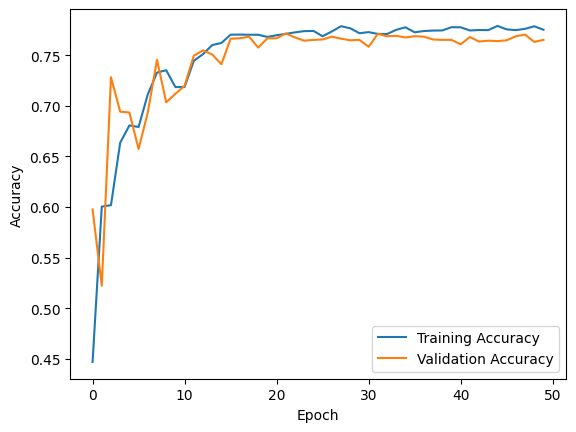

In [15]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes for the validation set
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

9/9 [==============================] - 5s 521ms/step


In [74]:
true_positives = np.sum((y_pred == 1) & (y_true == 1))
false_positives = np.sum((y_pred == 1) & (y_true == 0))
false_negatives = np.sum((y_pred == 0) & (y_true == 1))
true_negatives = np.sum((y_pred == 0) & (y_true == 0))




# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives + 1e-9)

# Calculate Precision
precision = true_positives / (true_positives + false_positives + 1e-9)

# Calculate Recall
recall = true_positives / (true_positives + false_negatives + 1e-9)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)

# Print the results
print("CNN_Accuracy: {:.2%}".format(accuracy))
print("CNN_Precision: {:.2%}".format(precision))
print("CNN_Recall: {:.2%}".format(recall))
print("CNN_F1 Score: {:.2%}".format(f1_score))

CNN_Accuracy: 99.96%
CNN_Precision: 97.50%
CNN_Recall: 95.62%
CNN_F1 Score: 96.55%


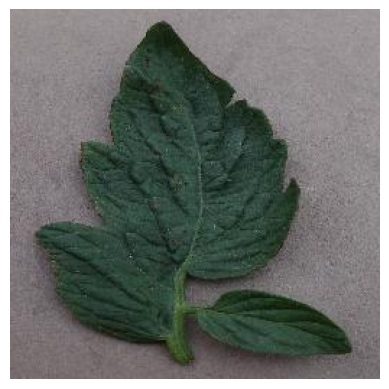

1/1 [==============================] - 0s 77ms/step
Predicted class: 3
Predicted disease: Tomato_Late Blight


In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load and preprocess the image
img_path = '/kaggle/input/tomato-dataset/n_train/Tomato_Bacterial Spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Map the class index to the actual class name (you may need a mapping based on your dataset)
class_labels = {0: 'Tomato_Bacterial Spot', 1: 'Tomato_Early Blight', 2: 'Tomato_Healthy', 3: 'Tomato_Late Blight', 4: 'Tomato_Septoria Leaf Spot', 5: 'Tomato_Yellow Leaf Curl Virus'}  # Replace with your actual class names

# Print the predicted disease
predicted_disease = class_labels.get(predicted_class, 'Unknown Disease')
print("Predicted disease:", predicted_disease)


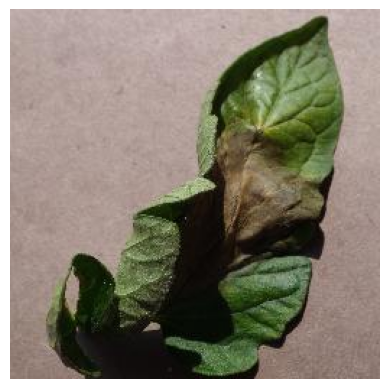

1/1 [==============================] - 0s 19ms/step
Predicted class: 5
Predicted disease: Tomato_Yellow Leaf Curl Virus


In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load and preprocess the image
img_path = '/kaggle/input/tomato-dataset/n_train/Tomato_Late Blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Map the class index to the actual class name (you may need a mapping based on your dataset)
class_labels = {0: 'Tomato_Bacterial Spot', 1: 'Tomato_Early Blight', 2: 'Tomato_Healthy', 3: 'Tomato_Late Blight', 4: 'Tomato_Septoria Leaf Spot', 5: 'Tomato_Yellow Leaf Curl Virus'}  # Replace with your actual class names

# Print the predicted disease
predicted_disease = class_labels.get(predicted_class, 'Unknown Disease')
print("Predicted disease:", predicted_disease)


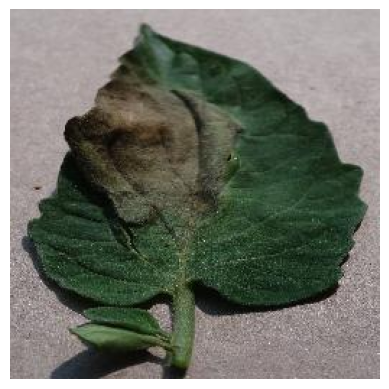

1/1 [==============================] - 0s 19ms/step
Predicted class: 3
Predicted disease: Tomato_Late Blight


In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load and preprocess the image
img_path = '/kaggle/input/tomato-dataset/n_train/Tomato_Late Blight/017a9839-6097-45aa-85b0-3051db151484___RS_Late.B 5125.JPG'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Map the class index to the actual class name (you may need a mapping based on your dataset)
class_labels = {0: 'Tomato_Bacterial Spot', 1: 'Tomato_Early Blight', 2: 'Tomato_Healthy', 3: 'Tomato_Late Blight', 4: 'Tomato_Septoria Leaf Spot', 5: 'Tomato_Yellow Leaf Curl Virus'}  # Replace with your actual class names

# Print the predicted disease
predicted_disease = class_labels.get(predicted_class, 'Unknown Disease')
print("Predicted disease:", predicted_disease)
